In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve,f1_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.preprocessing import Binarizer
from sklearn.metrics import roc_auc_score

In [13]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# Label Encoding. 
def encode_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    return df

In [42]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [21]:
df_titanic = pd.read_csv('/Users/heesang/Downloads/titanic/train.csv')
df_x_titanic = transform_features(df_titanic)
df_y_titanic = df_titanic['Survived']
df_x_titanic = df_titanic.drop('Survived', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(df_x_titanic, df_y_titanic, test_size = 0.2, random_state = 11)
lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('Shape Of Threshold List:', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print('Sample Threshold Index:', thr_index)
print('Sample Threshold Value', np.round(thresholds[thr_index], 2))

print('Sample Threshold Precision: ', np.round(precisions[thr_index], 3))
print('Sample Threshold Recall:', np.round(recalls[thr_index], 3))

Shape Of Threshold List: (147,)
Sample Threshold Index: [  0  15  30  45  60  75  90 105 120 135]
Sample Threshold Value [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
Sample Threshold Precision:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
Sample Threshold Recall: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


In [25]:
def precision_recall_cureve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],  linestyle='--',
            label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Treshold value')
    plt.ylabel('Precision and Recall value')
    plt.show()

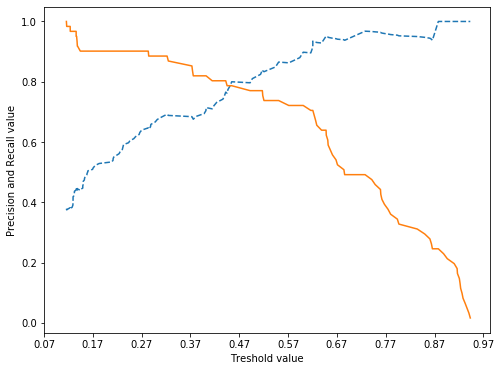

In [27]:
precision_recall_cureve_plot(y_test, lr_clf.predict_proba(x_test)[:, 1])

In [28]:
#F1 Score API를 이용한 성능 지표 확인
pred_proba = lr_clf.predict_proba(x_test)

In [33]:
X =[[1, -1,  2],
    [2, 0, 0],
    [0, 1.1, 1.2]]
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [36]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('Threshold:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [43]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

Threshold: 0.4
Confusion Matrix
[[97 21]
 [11 50]]
Accuracy: 0.8212, Precision: 0.7042, Recall: 0.8197, F1: 0.7576
Threshold: 0.45
Confusion Matrix
[[105  13]
 [ 13  48]]
Accuracy: 0.8547, Precision: 0.7869, Recall: 0.7869, F1: 0.7869
Threshold: 0.5
Confusion Matrix
[[108  10]
 [ 14  47]]
Accuracy: 0.8659, Precision: 0.8246, Recall: 0.7705, F1: 0.7966
Threshold: 0.55
Confusion Matrix
[[111   7]
 [ 16  45]]
Accuracy: 0.8715, Precision: 0.8654, Recall: 0.7377, F1: 0.7965
Threshold: 0.6
Confusion Matrix
[[113   5]
 [ 17  44]]
Accuracy: 0.8771, Precision: 0.8980, Recall: 0.7213, F1: 0.8000


In [49]:
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(0, thresholds.shape[0], 5)

print('Sample Threshold index (n = 10)', thr_index)
print('Sample Threshold value (n = 10)', np.round(thresholds[thr_index], 2))

print('Sample Threshold FPR', np.round(fprs[thr_index], 3))
print('Sample Threshold TPR', np.round(tprs[thr_index], 3))

Sample Threshold index (n = 10) [ 0  5 10 15 20 25 30 35 40 45]
Sample Threshold value (n = 10) [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
Sample Threshold FPR [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
Sample Threshold TPR [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


In [50]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0,1 ], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR (1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show

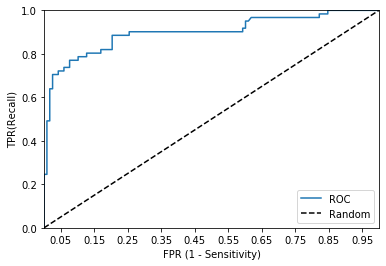

In [54]:
roc_curve_plot(y_test, pred_proba[:,1])

In [56]:
pred = lr_clf.predict(x_test)
roc_score = roc_auc_score(y_test, pred)

print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8429
